In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
df = pd.read_csv('drug200.csv', delimiter =",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [7]:
df.size
#df.shape

1200

In [11]:
x = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

In [13]:
x[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [14]:
y = df[['Drug']].values

In [15]:
y[0:5]

array([['drugY'],
       ['drugC'],
       ['drugC'],
       ['drugX'],
       ['drugY']], dtype=object)

In [17]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_bp = preprocessing.LabelEncoder()
le_cholestrol = preprocessing.LabelEncoder()

In [18]:
le_sex.fit(['F','M'])
le_bp.fit(['HIGH','NORMAL', 'LOW'])
le_cholestrol.fit(['NORMAL', "HIGH"])

LabelEncoder()

In [28]:
x[:,1] = le_sex.transform(x[:,1])

In [30]:
x[:,2] = le_bp.transform(x[:,2])

In [31]:
x[:,3] = le_cholestrol.transform(x[:,3])

In [32]:
x[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 3)

In [34]:
x_train.shape

(160, 5)

In [35]:
drugTree = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
drugTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
drugTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
predTree = drugTree.predict(x_test)

In [38]:
predTree[0:5]

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX'], dtype=object)

In [39]:
y_test[0:5]

array([['drugY'],
       ['drugX'],
       ['drugX'],
       ['drugX'],
       ['drugX']], dtype=object)

In [40]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
print("Decision Tree's Accuracy: ", metrics.accuracy_score(y_test, predTree))

Decision Tree's Accuracy:  1.0


In [46]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

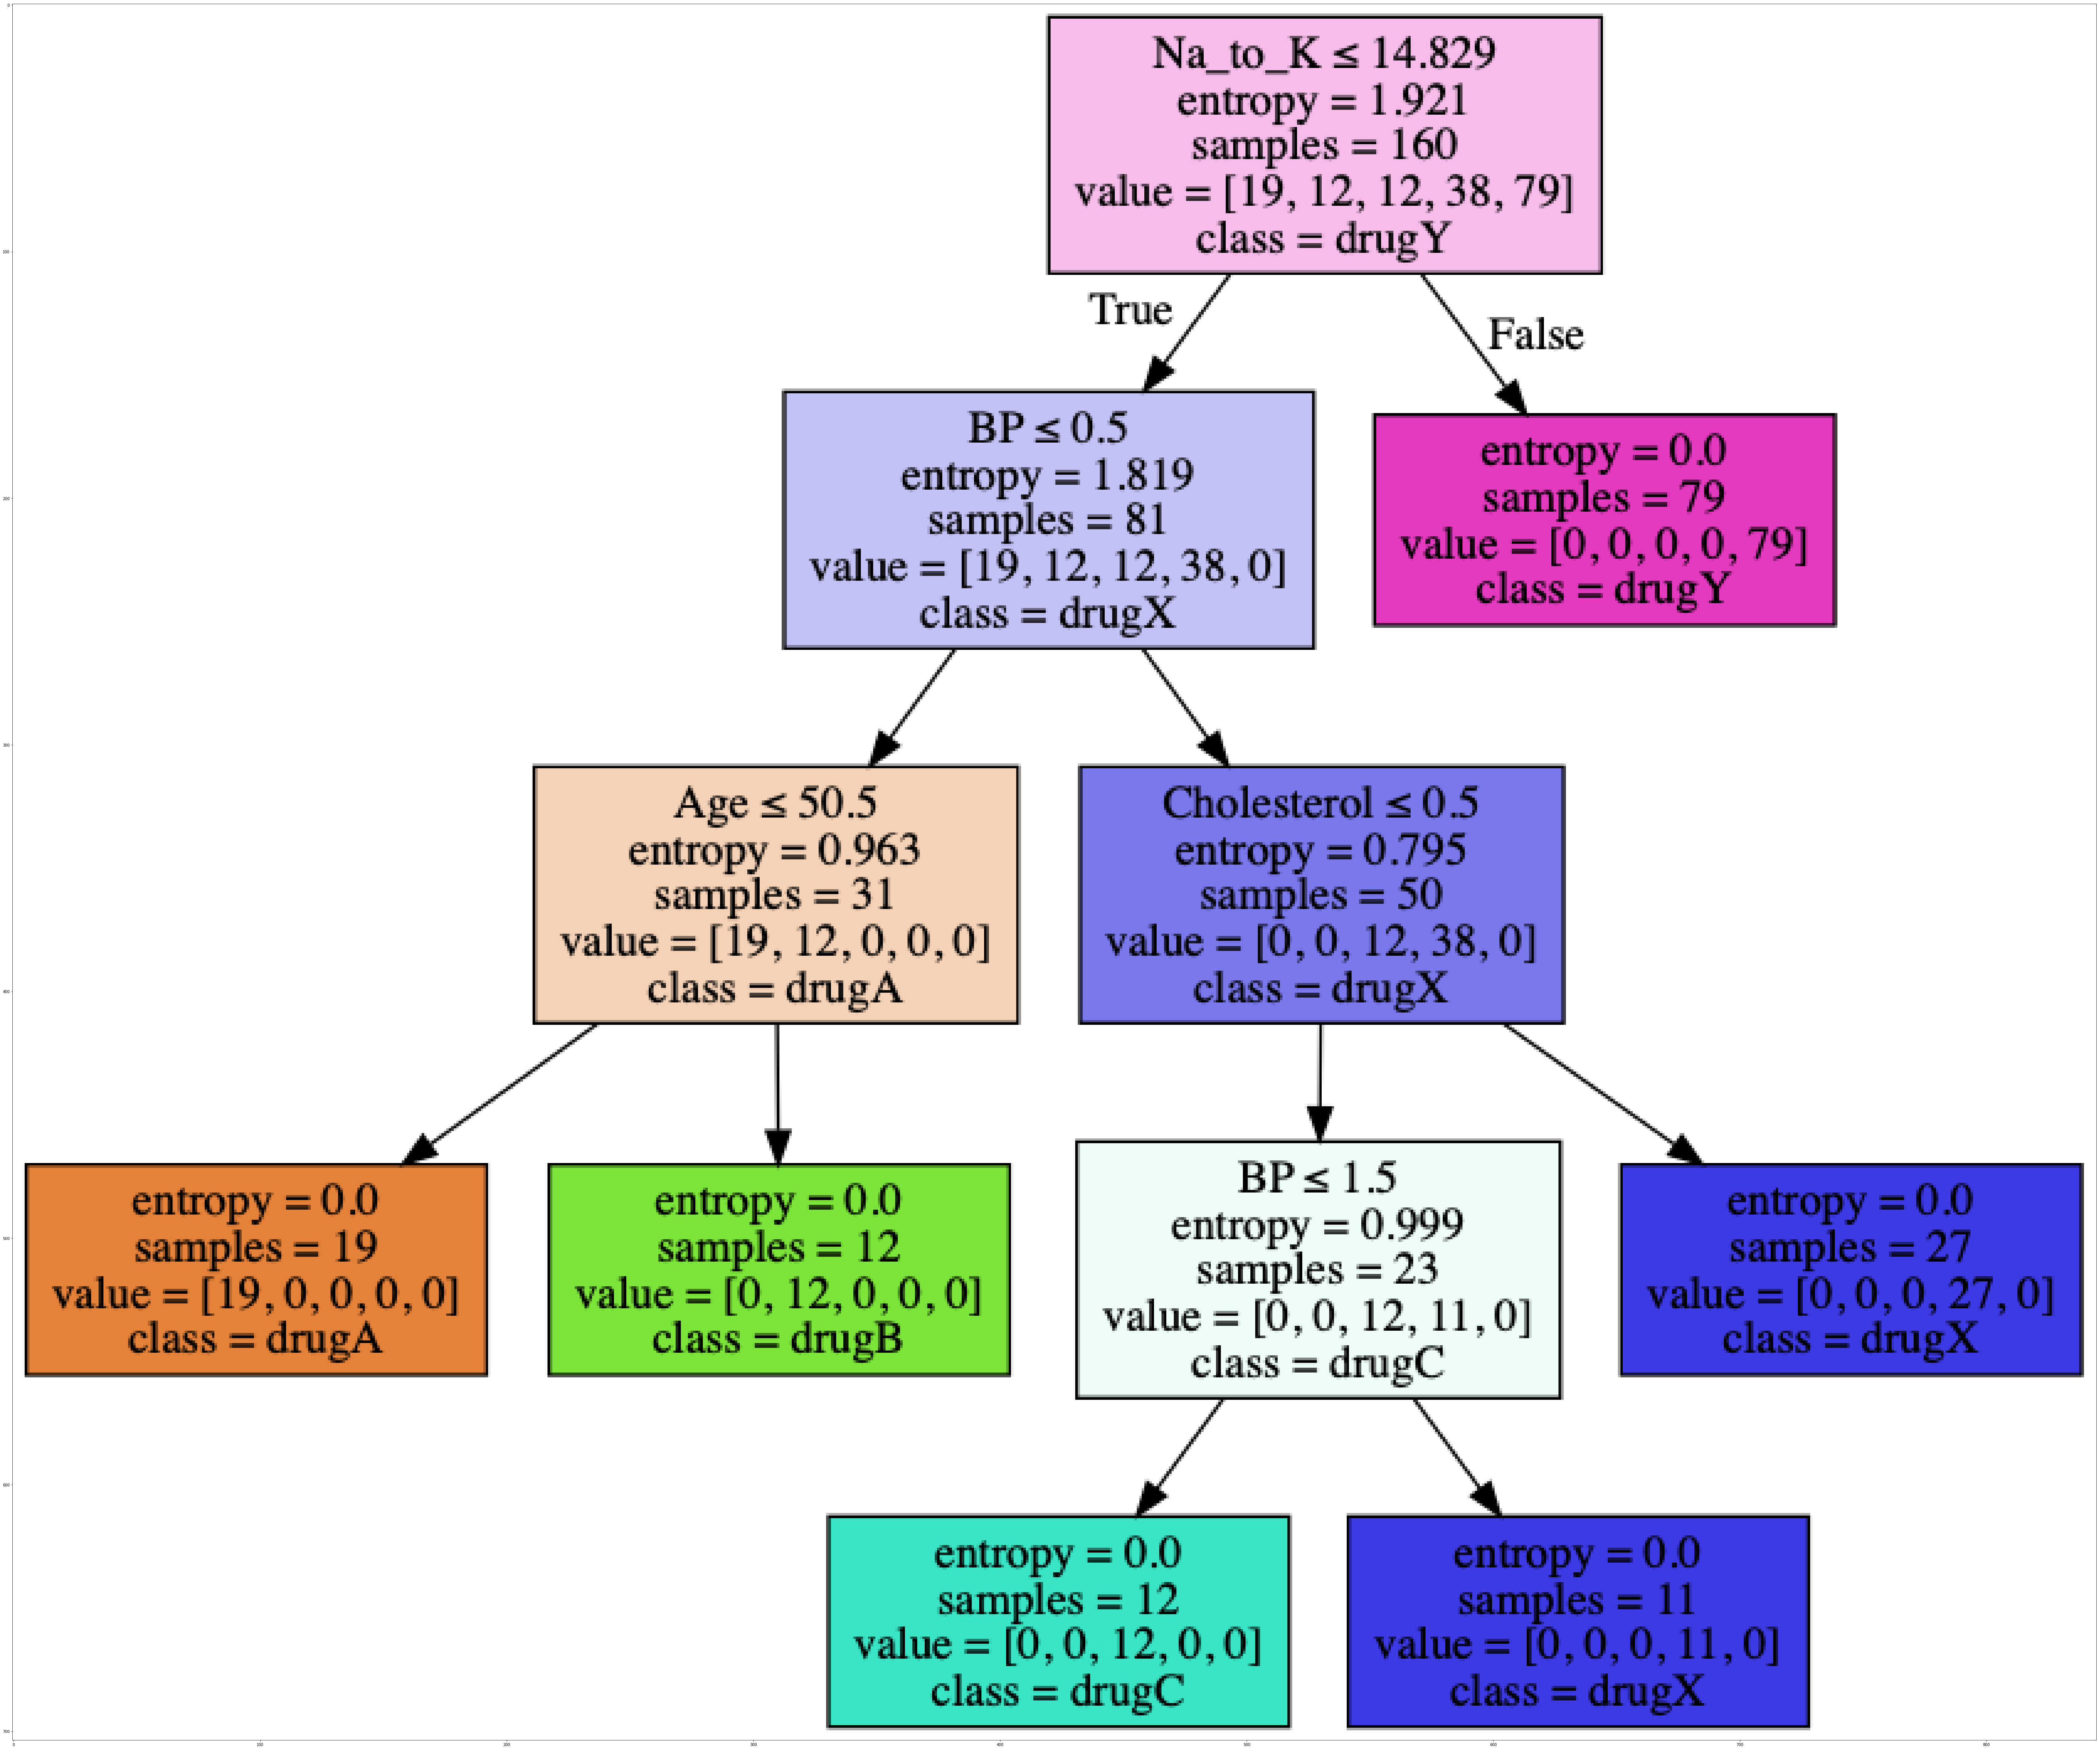

In [48]:
dot_data = StringIO()
filename = "drugTree.png"
featurenames = df.columns[0:5]
targetnames = df['Drug'].unique().tolist()
out = tree.export_graphviz(drugTree, feature_names = featurenames, out_file = dot_data, class_names = np.unique(y_train), filled = True, special_characters= True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize = (100, 200))
plt.imshow(img, interpolation='nearest')